# 1. Problem Statement

The data scientists at BigMart have collected 2013 sales data for 1559 products across 10 stores in different cities. Also, certain attributes of each product and store have been defined. The aim is to build a predictive model and find out the sales of each product at a particular store.

Using this model, BigMart will try to understand the properties of products and stores which play a key role in increasing the sales of their products.

# 2. Description of dataset

On the basis of dataset feature which has been provided to us,below are the description for those features:
1. Item Identifier: Unique product identification code.
2. Item Weight: Weight of the product.
3. Item Fat Content: Fat content in product,low fat content product may sale more compare to high fat content product.
4. Item Visibility: The % of area being use to dispaly the particular product.We can sense that if the product visibility is more in store it may lead more sale compare to other product.
5. Item Type: The category to which product belongs. 
6. Item MRP: Mrp of the product
7. Outlet Identifier: Unique Outlet identification number.
8. Outlet Establishment: The establishment year of store.
9. Outlet Size: The size of store means the capacity of store, bigger store may contain more product where sale would be relatively high compare to small size store.
10. Outlet location type:The type of city where store is located, Tier 1 city would have more sale compare to other class city becuase the high income of population in tier 1 city.
11. Outlet Type: whether the outlet is just grocery store or supermarket, usually supermarket sale would be high compare to grocery store due to capacity of product being displayed at store.
12. Item outlet sale: Sale of the particular outlet for 2013.

# 3. Import liabrary

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# 4. Import Dataset

In [3]:
data_train=pd.read_csv("bigdatamart_Train.csv")
data_test=pd.read_csv("bigdatamart_Test.csv")

**There are two dataset available train and test dataset.**

# 5.Basic Analysis of dataset

In [4]:
data_train.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [5]:
data_test.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [6]:
print(data_train.shape)
print(data_test.shape)

(8523, 12)
(5681, 11)


Train data set having 8523 observation and 12 features.

Test data set having 5681 obsrevation and 11 features.

In [7]:
print(data_train.info())
print(data_test.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB
None
<class 'pandas.core.frame.DataFrame'>
Ra

1. There are 4 column for float,1 int and 7 object type in train dataset.
2. There are 3 float column, 1 int and 7 object type in test dataset.

In [8]:
data_train.describe(include="all")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
count,8523,7060.000000,8523,8523.000000,8523,8523.000000,8523,8523.000000,6113,8523,8523,8523.000000
unique,1559,NaN,5,NaN,16,NaN,10,NaN,3,3,4,NaN
top,FDG33,NaN,Low Fat,NaN,Fruits and Vegetables,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1,NaN
freq,10,NaN,5089,NaN,1232,NaN,935,NaN,2793,3350,5577,NaN
mean,NaN,12.857645,NaN,0.066132,NaN,140.992782,NaN,1997.831867,NaN,NaN,NaN,2181.288914
std,NaN,4.643456,NaN,0.051598,NaN,62.275067,NaN,8.371760,NaN,NaN,NaN,1706.499616
min,NaN,4.555000,NaN,0.000000,NaN,31.290000,NaN,1985.000000,NaN,NaN,NaN,33.290000
25%,NaN,8.773750,NaN,0.026989,NaN,93.826500,NaN,1987.000000,NaN,NaN,NaN,834.247400
50%,NaN,12.600000,NaN,0.053931,NaN,143.012800,NaN,1999.000000,NaN,NaN,NaN,1794.331000
75%,NaN,16.850000,NaN,0.094585,NaN,185.643700,NaN,2004.000000,NaN,NaN,NaN,3101.296400


1. There are some missing value in Item weight,otlet size featurs.
2. For numerical features the mean and median difference are very less, so mostly data would be not so skewed.will varify this in future.
3. There are 1559 products are available in dataset.
4. There are 16 type of category to which product belong.
5. There are minimum value zero in item visibility, which would not possible will check on this to confirm.
6. The maximum price of the product in store is 266.88 and the minimum is 31.29.


In [9]:
data_test.describe(include="all")

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
count,5681,4705.000000,5681,5681.000000,5681,5681.000000,5681,5681.000000,4075,5681,5681
unique,1543,NaN,5,NaN,16,NaN,10,NaN,3,3,4
top,DRF48,NaN,Low Fat,NaN,Snack Foods,NaN,OUT027,NaN,Medium,Tier 3,Supermarket Type1
freq,8,NaN,3396,NaN,789,NaN,624,NaN,1862,2233,3717
mean,NaN,12.695633,NaN,0.065684,NaN,141.023273,NaN,1997.828903,NaN,NaN,NaN
std,NaN,4.664849,NaN,0.051252,NaN,61.809091,NaN,8.372256,NaN,NaN,NaN
min,NaN,4.555000,NaN,0.000000,NaN,31.990000,NaN,1985.000000,NaN,NaN,NaN
25%,NaN,8.645000,NaN,0.027047,NaN,94.412000,NaN,1987.000000,NaN,NaN,NaN
50%,NaN,12.500000,NaN,0.054154,NaN,141.415400,NaN,1999.000000,NaN,NaN,NaN
75%,NaN,16.700000,NaN,0.093463,NaN,186.026600,NaN,2004.000000,NaN,NaN,NaN


1. There are some missing value in Item weight,otlet size featurs.
2. For numerical features the mean and median difference are very less, so mostly data would be not so skewed.will varify this in future.
3. There are 1543 products are available in dataset.
4. There are 16 type of category to which product belong.
5. There are minimum value zero in item visibility, which would not possible will check on this to confirm.
6. The maximum price of the product in store is 266.58 and the minimum is 31.99.


# 6. Checking the null value in dataset

In [10]:
data_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

**In trainig set there are 1463 null value is present in item weight and 2410 in outlet size.**

In [15]:
data_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

**In test data set there are 976 null value is present in item weight and 1606 in outlet size.**

# 7. Seperate categorical and numerical fatures.

### 7.1 For Train dataset

In [16]:
train_num=pd.DataFrame(data_train.drop(columns=["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"],axis=1))

In [17]:
train_num

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [18]:
train_cat=pd.DataFrame(data_train.drop(columns=["Item_Weight","Item_Visibility","Item_MRP","Outlet_Establishment_Year","Item_Outlet_Sales"],axis=1))

In [19]:
train_cat

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,NaN,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,NaN,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


### 7.1 For Test dataset

In [20]:
test_num=pd.DataFrame(data_test.drop(columns=["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"],axis=1))

In [21]:
test_num

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
0,20.750,0.007565,107.8622,1999
1,8.300,0.038428,87.3198,2007
2,14.600,0.099575,241.7538,1998
3,7.315,0.015388,155.0340,2007
4,NaN,0.118599,234.2300,1985
...,...,...,...,...
5676,10.500,0.013496,141.3154,1997
5677,7.600,0.142991,169.1448,2009
5678,10.000,0.073529,118.7440,2002
5679,15.300,0.000000,214.6218,2007


In [22]:
test_cat=pd.DataFrame(data_test.drop(columns=["Item_Weight","Item_Visibility","Item_MRP","Outlet_Establishment_Year"],axis=1))

In [23]:
test_cat

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,Low Fat,Snack Foods,OUT049,Medium,Tier 1,Supermarket Type1
1,FDW14,reg,Dairy,OUT017,NaN,Tier 2,Supermarket Type1
2,NCN55,Low Fat,Others,OUT010,NaN,Tier 3,Grocery Store
3,FDQ58,Low Fat,Snack Foods,OUT017,NaN,Tier 2,Supermarket Type1
4,FDY38,Regular,Dairy,OUT027,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...
5676,FDB58,Regular,Snack Foods,OUT046,Small,Tier 1,Supermarket Type1
5677,FDD47,Regular,Starchy Foods,OUT018,Medium,Tier 3,Supermarket Type2
5678,NCO17,Low Fat,Health and Hygiene,OUT045,NaN,Tier 2,Supermarket Type1
5679,FDJ26,Regular,Canned,OUT017,NaN,Tier 2,Supermarket Type1


# 8.Univariate Analysis

### 8.1 Item Identifier

In [11]:
data_train["Item_Identifier"].value_counts()

FDG33    10
FDW13    10
FDO19     9
FDP25     9
NCI54     9
         ..
FDK57     1
FDO33     1
FDY43     1
DRF48     1
FDQ60     1
Name: Item_Identifier, Length: 1559, dtype: int64

**Train set we have totally 1559 product.**

**Test set we have totally 1543 product.**

In [12]:
data_train.groupby("Item_Identifier")["Item_Outlet_Sales"].mean().sort_values(ascending=False)

Item_Identifier
FDR45    6035.310550
NCL42    5962.017067
FDU55    5922.457450
FDZ50    5512.824000
DRK23    5464.886400
            ...     
NCN29     311.061760
FDX10     291.121050
FDQ04     261.437467
FDQ60     120.509800
NCR42     110.966667
Name: Item_Outlet_Sales, Length: 1559, dtype: float64

**we can see top 5 product average sale value.**

### 8.2 Item Fat Content

In [26]:
data_train["Item_Fat_Content"].value_counts()

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64

In [27]:
data_test["Item_Fat_Content"].value_counts()

Low Fat    3396
Regular    1935
LF          206
reg          78
low fat      66
Name: Item_Fat_Content, dtype: int64

** As we can see there are only low fat and regular fat in fat_content, but it seems like Low Fat,LF and low fat all represent to Low Fat product only, so we will represent all by Low Fat only. same method will apply for Regular also.**

In [28]:
data_train["Item_Fat_Content"]=data_train["Item_Fat_Content"].replace({"LF":"Low Fat","low fat":"Low Fat","Regular":"Regular Fat","reg":"Regular Fat"})

In [29]:
data_test["Item_Fat_Content"]=data_test["Item_Fat_Content"].replace({"LF":"Low Fat","low fat":"Low Fat","Regular":"Regular Fat","reg":"Regular Fat"})

In [30]:
data_train["Item_Fat_Content"].value_counts()

Low Fat        5517
Regular Fat    3006
Name: Item_Fat_Content, dtype: int64

In [31]:
data_test["Item_Fat_Content"].value_counts()

Low Fat        3668
Regular Fat    2013
Name: Item_Fat_Content, dtype: int64

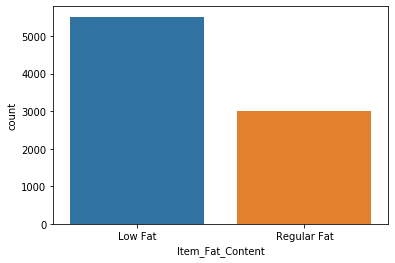

In [32]:
sns.countplot(data_train["Item_Fat_Content"])

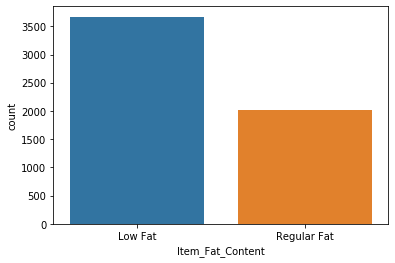

In [33]:
sns.countplot(data_test["Item_Fat_Content"])

### 8.3 Item Type

In [34]:
data_train["Item_Type"].value_counts()

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64

** As we can see in Fruits and vegetables category the product line contribution is more than followed with snack foods,househould,Frozen Foods and Dairy.**

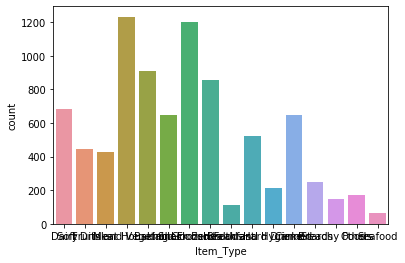

In [35]:
sns.countplot(data_train["Item_Type"])

In [36]:
data_test["Item_Type"].value_counts()

Snack Foods              789
Fruits and Vegetables    781
Household                638
Frozen Foods             570
Dairy                    454
Baking Goods             438
Canned                   435
Health and Hygiene       338
Meat                     311
Soft Drinks              281
Breads                   165
Hard Drinks              148
Starchy Foods            121
Others                   111
Breakfast                 76
Seafood                   25
Name: Item_Type, dtype: int64

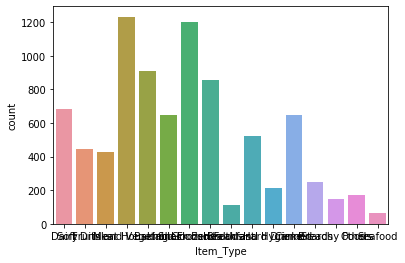

In [37]:
sns.countplot(data_train["Item_Type"])

### 8.4 Outlet Identifier

In [38]:
data_train["Outlet_Identifier"].value_counts()

OUT027    935
OUT013    932
OUT035    930
OUT049    930
OUT046    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64

** There are 10 outlet id is available in train dataset**

In [39]:
data_test["Outlet_Identifier"].value_counts()

OUT027    624
OUT013    621
OUT035    620
OUT049    620
OUT046    620
OUT045    619
OUT018    618
OUT017    617
OUT010    370
OUT019    352
Name: Outlet_Identifier, dtype: int64

**Training dataset and test dataset having same oulet.**

In [40]:
data_train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

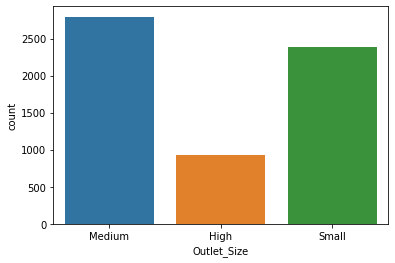

In [41]:
sns.countplot(data_train["Outlet_Size"])

**As we can see maximum outlet are Medium type store and less outlet are high in size type store in train dataset.**

In [42]:
data_test["Outlet_Size"].value_counts()

Medium    1862
Small     1592
High       621
Name: Outlet_Size, dtype: int64

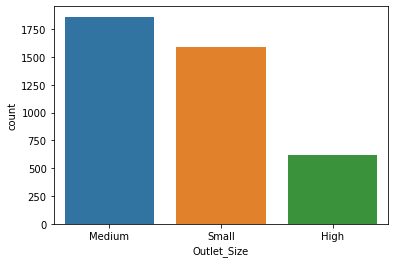

In [43]:
sns.countplot(data_test["Outlet_Size"])

### 8.5 Outlet location type

In [44]:
data_train["Outlet_Location_Type"].value_counts()

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64

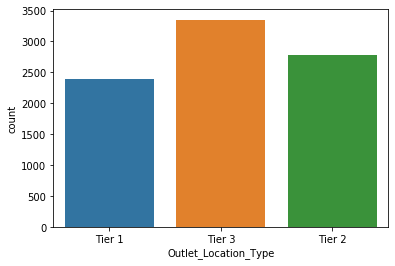

In [45]:
sns.countplot(data_train["Outlet_Location_Type"])

In [46]:
data_test["Outlet_Location_Type"].value_counts()

Tier 3    2233
Tier 2    1856
Tier 1    1592
Name: Outlet_Location_Type, dtype: int64

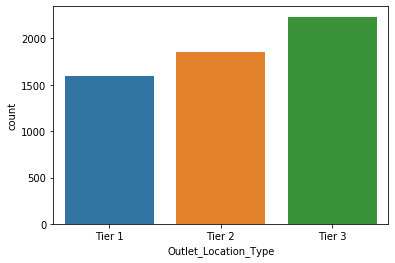

In [47]:
sns.countplot(data_test["Outlet_Location_Type"])

### 8.6 Outlet Type

In [48]:
data_train["Outlet_Type"].value_counts()

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64

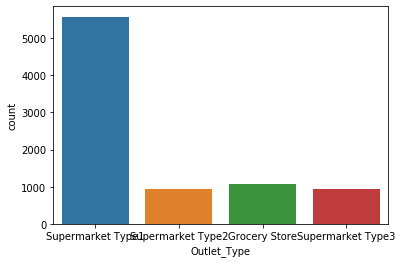

In [49]:
sns.countplot(data_train["Outlet_Type"])

In [50]:
data_test["Outlet_Type"].value_counts()

Supermarket Type1    3717
Grocery Store         722
Supermarket Type3     624
Supermarket Type2     618
Name: Outlet_Type, dtype: int64

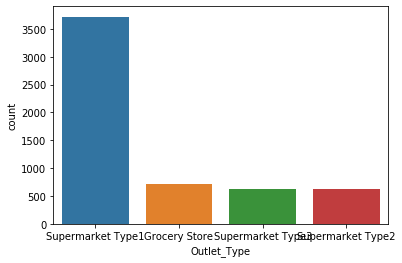

In [51]:
sns.countplot(data_test["Outlet_Type"])

** As we can see supermarket type1 type of store are more in both dataset.**

### 8.7 Item Weight

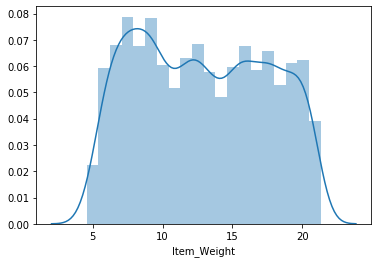

In [52]:
sns.distplot(data_train["Item_Weight"])

**As we can see data distribution is almost normal distribution and no data are skwed.**

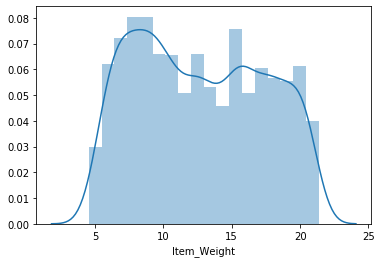

In [53]:
sns.distplot(data_test["Item_Weight"])

### 8.8 Item Visibility

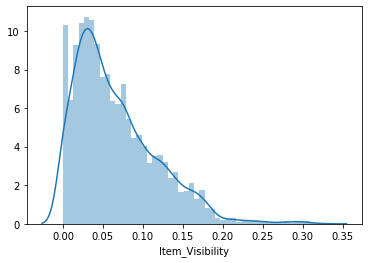

In [54]:
sns.distplot(data_train["Item_Visibility"])

**We can see in above plot that item visibility distribution is skewed in right side.**

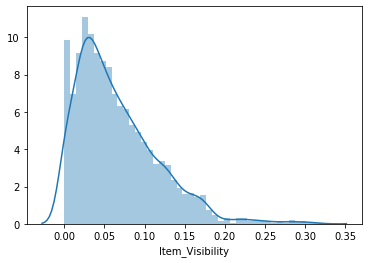

In [55]:
sns.distplot(data_test["Item_Visibility"])

### 8.9 Item MRP

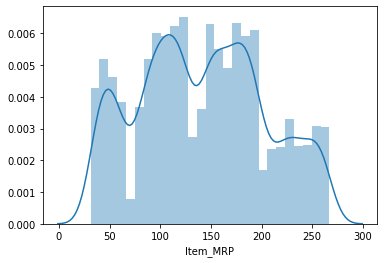

In [56]:
sns.distplot(data_train["Item_MRP"])

**As we can see data distribution is almost normal distribution and no data are skwed.**

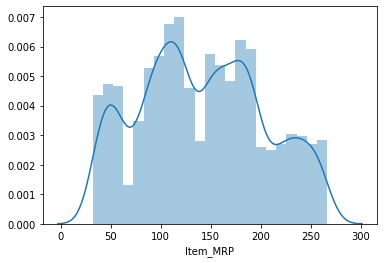

In [57]:
sns.distplot(data_test["Item_MRP"])

### 8.10 Item Outlet Sale

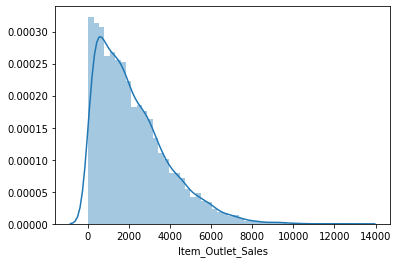

In [58]:
sns.distplot(data_train["Item_Outlet_Sales"])

**AS we can see here there are few outlet which doing more sale values**

# 9. Handling missing Value

### 9.1 Dealing Item weight missing Value

In [59]:
data_train["Item_Weight"].isnull().sum()

1463

In [60]:
data_train[data_train["Item_Weight"].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
7,FDP10,NaN,Low Fat,0.127470,Snack Foods,107.7622,OUT027,1985,Medium,Tier 3,Supermarket Type3,4022.7636
18,DRI11,NaN,Low Fat,0.034238,Hard Drinks,113.2834,OUT027,1985,Medium,Tier 3,Supermarket Type3,2303.6680
21,FDW12,NaN,Regular Fat,0.035400,Baking Goods,144.5444,OUT027,1985,Medium,Tier 3,Supermarket Type3,4064.0432
23,FDC37,NaN,Low Fat,0.057557,Baking Goods,107.6938,OUT019,1985,Small,Tier 1,Grocery Store,214.3876
29,FDC14,NaN,Regular Fat,0.072222,Canned,43.6454,OUT019,1985,Small,Tier 1,Grocery Store,125.8362
...,...,...,...,...,...,...,...,...,...,...,...,...
8485,DRK37,NaN,Low Fat,0.043792,Soft Drinks,189.0530,OUT027,1985,Medium,Tier 3,Supermarket Type3,6261.8490
8487,DRG13,NaN,Low Fat,0.037006,Soft Drinks,164.7526,OUT027,1985,Medium,Tier 3,Supermarket Type3,4111.3150
8488,NCN14,NaN,Low Fat,0.091473,Others,184.6608,OUT027,1985,Medium,Tier 3,Supermarket Type3,2756.4120
8490,FDU44,NaN,Regular Fat,0.102296,Fruits and Vegetables,162.3552,OUT019,1985,Small,Tier 1,Grocery Store,487.3656


In [61]:
data_train["Item_Weight"]=data_train["Item_Weight"].fillna(data_train["Item_Weight"].mean())

In [62]:
data_train["Item_Weight"].isnull().sum()

0

In [63]:
data_test["Item_Weight"].isnull().sum()

976

In [64]:
data_test["Item_Weight"]=data_test["Item_Weight"].fillna(data_test["Item_Weight"].mean())

In [65]:
data_test["Item_Weight"].isnull().sum()

0

### 9.2  Dealing Outlet Size missing Value

In [66]:
data_train["Outlet_Size"].isnull().sum()

2410

In [67]:
data_train[data_train["Outlet_Size"].isnull()]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200,Regular Fat,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
8,FDH17,16.200,Regular Fat,0.016687,Frozen Foods,96.9726,OUT045,2002,NaN,Tier 2,Supermarket Type1,1076.5986
9,FDU28,19.200,Regular Fat,0.094450,Frozen Foods,187.8214,OUT017,2007,NaN,Tier 2,Supermarket Type1,4710.5350
25,NCD06,13.000,Low Fat,0.099887,Household,45.9060,OUT017,2007,NaN,Tier 2,Supermarket Type1,838.9080
28,FDE51,5.925,Regular Fat,0.161467,Dairy,45.5086,OUT010,1998,NaN,Tier 3,Grocery Store,178.4344
...,...,...,...,...,...,...,...,...,...,...,...,...
8502,NCH43,8.420,Low Fat,0.070712,Household,216.4192,OUT045,2002,NaN,Tier 2,Supermarket Type1,3020.0688
8508,FDW31,11.350,Regular Fat,0.043246,Fruits and Vegetables,199.4742,OUT045,2002,NaN,Tier 2,Supermarket Type1,2587.9646
8509,FDG45,8.100,Low Fat,0.214306,Fruits and Vegetables,213.9902,OUT010,1998,NaN,Tier 3,Grocery Store,424.7804
8514,FDA01,15.000,Regular Fat,0.054489,Canned,57.5904,OUT045,2002,NaN,Tier 2,Supermarket Type1,468.7232


In [68]:
data_train["Outlet_Size"].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

**For filling nan in outlet size we will use mode method.**

In [69]:
data_train["Outlet_Size"]=data_train["Outlet_Size"].fillna(data_train["Outlet_Size"].mode()[0])

In [70]:
data_train["Outlet_Size"].isnull().sum()

0

In [71]:
data_test["Outlet_Size"].isnull().sum()

1606

In [72]:
data_test["Outlet_Size"]=data_test["Outlet_Size"].fillna(data_test["Outlet_Size"].mode()[0])

In [73]:
data_test["Outlet_Size"].isnull().sum()

0

### 9.3 Dealing with zero value in Item Visibility features

**As we have seen in our basic anaylysis that there are zero value in item visibility columns which is not possible that those item has not been displayed at store, since those products are belong to various category. So we will replace zero with mean item visibility for the column.**m

**For Train Dataset.**

In [74]:
data_train[data_train["Item_Visibility"]==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
3,FDX07,19.200000,Regular Fat,0.0,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930000,Low Fat,0.0,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
5,FDP36,10.395000,Regular Fat,0.0,Baking Goods,51.4008,OUT018,2009,Medium,Tier 3,Supermarket Type2,556.6088
10,FDY07,11.800000,Low Fat,0.0,Fruits and Vegetables,45.5402,OUT049,1999,Medium,Tier 1,Supermarket Type1,1516.0266
32,FDP33,18.700000,Low Fat,0.0,Snack Foods,256.6672,OUT018,2009,Medium,Tier 3,Supermarket Type2,3068.0064
...,...,...,...,...,...,...,...,...,...,...,...,...
8480,FDQ58,12.857645,Low Fat,0.0,Snack Foods,154.5340,OUT019,1985,Small,Tier 1,Grocery Store,459.4020
8484,DRJ49,6.865000,Low Fat,0.0,Soft Drinks,129.9652,OUT013,1987,High,Tier 3,Supermarket Type1,2324.9736
8486,FDR20,20.000000,Regular Fat,0.0,Fruits and Vegetables,46.4744,OUT010,1998,Medium,Tier 3,Grocery Store,45.2744
8494,NCI54,15.200000,Low Fat,0.0,Household,110.4912,OUT017,2007,Medium,Tier 2,Supermarket Type1,1637.8680


In [75]:
(data_train["Item_Visibility"]==0).sum()

526

In [76]:
data_train["Item_Visibility"]=data_train["Item_Visibility"].replace(0,data_train["Item_Visibility"].mean())

In [77]:
(data_train["Item_Visibility"]==0).sum()

0

**For Test Dataset.**

In [78]:
data_test[data_test["Item_Visibility"]==0]

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
56,FDA09,13.350000,Regular Fat,0.0,Snack Foods,179.6660,OUT013,1987,High,Tier 3,Supermarket Type1
90,FDN39,19.350000,Regular Fat,0.0,Meat,165.7816,OUT045,2002,Medium,Tier 2,Supermarket Type1
109,FDU14,17.750000,Low Fat,0.0,Dairy,249.7750,OUT018,2009,Medium,Tier 3,Supermarket Type2
125,FDZ36,12.695633,Regular Fat,0.0,Baking Goods,186.4240,OUT027,1985,Medium,Tier 3,Supermarket Type3
140,DRF48,5.730000,Low Fat,0.0,Soft Drinks,188.3898,OUT010,1998,Medium,Tier 3,Grocery Store
...,...,...,...,...,...,...,...,...,...,...,...
5643,FDQ19,12.695633,Regular Fat,0.0,Fruits and Vegetables,244.3512,OUT019,1985,Small,Tier 1,Grocery Store
5648,FDK26,12.695633,Regular Fat,0.0,Canned,187.5240,OUT027,1985,Medium,Tier 3,Supermarket Type3
5654,FDQ57,7.275000,Low Fat,0.0,Snack Foods,144.5760,OUT013,1987,High,Tier 3,Supermarket Type1
5661,DRG37,12.695633,Low Fat,0.0,Soft Drinks,155.7972,OUT027,1985,Medium,Tier 3,Supermarket Type3


In [79]:
(data_test["Item_Visibility"]==0).sum()

353

In [80]:
data_test["Item_Visibility"]=data_test["Item_Visibility"].replace(0,data_test["Item_Visibility"].mean())

In [81]:
(data_test["Item_Visibility"]==0).sum()

0

# 10 Bivariate Analysis

### 10.1 Item Weight vs Item Outlet Sale

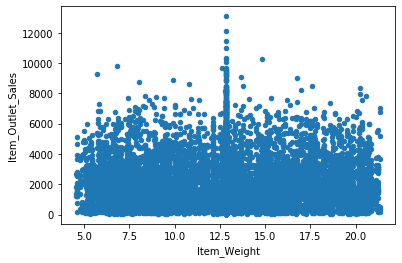

In [82]:
data_train.plot(kind="scatter",x="Item_Weight",y="Item_Outlet_Sales")

**As we can see there is no correlation item weight with item outlet sale.we will go and anylyse futher.**

### 10.2 Item visibility vs Item Outlet Sale

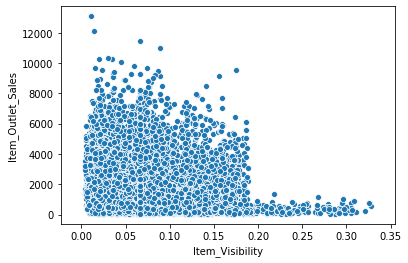

In [83]:
sns.scatterplot(x="Item_Visibility",y="Item_Outlet_Sales",data=data_train)

**As we can interpret from the above plot that item visibility lesser than 0.20 contributing more in sale, so its means that item are moving more from shelves compare to bigger dispaly on floor.So we can't say that if increasing in visiblity will generate more sale.**

### 10.3 Item MRP vs Item Outlet Sale

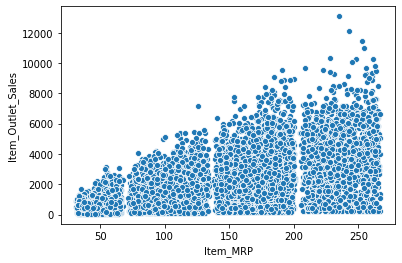

In [84]:
sns.scatterplot(x="Item_MRP",y="Item_Outlet_Sales",data=data_train)

** here we can interpret some regression pattern in data means increasing the MRP of the product leading more sales and logically is valid becuase more MRP product if gets sale it will contribute more in sale value.**

### 10.4 Outlet Establishment Year

In [85]:
data_train["Outlet_Establishment_Year"].value_counts()

1985    1463
1987     932
1999     930
1997     930
2004     930
2002     929
2009     928
2007     926
1998     555
Name: Outlet_Establishment_Year, dtype: int64

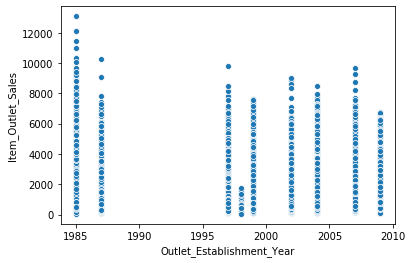

In [86]:
sns.scatterplot(x="Outlet_Establishment_Year",y="Item_Outlet_Sales",data=data_train)

**As we can interpret here that is doesn't look like opening stores was having positve impact on sale. Since there were no improvment in sale after opening new store.The sale was constant over the year.**

### 10.5 Item Fat Content vs Item Outlet Sale

In [87]:
data_train.groupby("Item_Fat_Content")["Item_Outlet_Sales"].mean()

Item_Fat_Content
Low Fat        2157.711534
Regular Fat    2224.561170
Name: Item_Outlet_Sales, dtype: float64

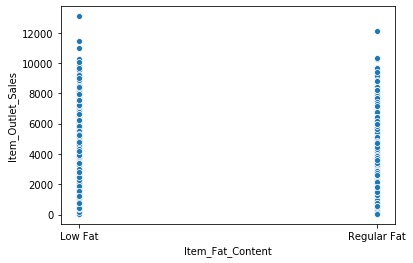

In [88]:
sns.scatterplot(x="Item_Fat_Content",y="Item_Outlet_Sales",data=data_train)

**As we can interpret here that from outlet low fat and Regular Fat was selling equally and having contribution in sale.**

### 10.6 Item Type vs Sale

In [89]:
data_train.groupby("Item_Type")["Item_Outlet_Sales"].mean()

Item_Type
Baking Goods             1952.971207
Breads                   2204.132226
Breakfast                2111.808651
Canned                   2225.194904
Dairy                    2232.542597
Frozen Foods             2132.867744
Fruits and Vegetables    2289.009592
Hard Drinks              2139.221622
Health and Hygiene       2010.000265
Household                2258.784300
Meat                     2158.977911
Others                   1926.139702
Seafood                  2326.065928
Snack Foods              2277.321739
Soft Drinks              2006.511735
Starchy Foods            2374.332773
Name: Item_Outlet_Sales, dtype: float64

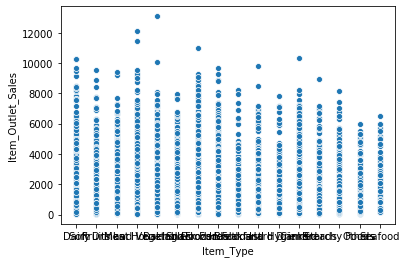

In [90]:
sns.scatterplot(x="Item_Type",y="Item_Outlet_Sales",data=data_train)

**here we can interpret that almost all categories were selling good from all outlet and categories having almost equal contribution in sale except some category which is very niche like Baking goods or Others.**

### 10.7 Outlet Identifier vs item Outlet Sale

In [91]:
data_train.groupby("Outlet_Identifier")["Item_Outlet_Sales"].mean()

Outlet_Identifier
OUT010     339.351662
OUT013    2298.995256
OUT017    2340.675263
OUT018    1995.498739
OUT019     340.329723
OUT027    3694.038558
OUT035    2438.841866
OUT045    2192.384798
OUT046    2277.844267
OUT049    2348.354635
Name: Item_Outlet_Sales, dtype: float64

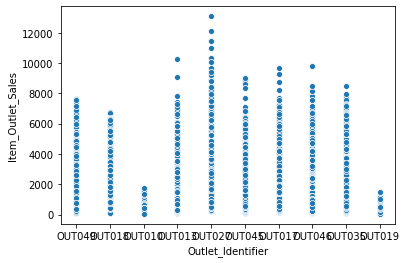

In [92]:
sns.scatterplot(x="Outlet_Identifier",y="Item_Outlet_Sales",data=data_train)

**here we can interpret like there were 2 outlet which perfoming not good in sale.**

### 10.8 Outlet Size vs item Outlet Sale

In [93]:
data_train.groupby("Outlet_Size")["Item_Outlet_Sales"].mean()

Outlet_Size
High      2298.995256
Medium    2283.730470
Small     1912.149161
Name: Item_Outlet_Sales, dtype: float64

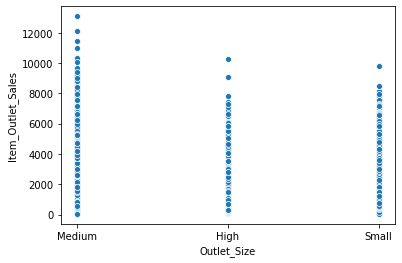

In [94]:
sns.scatterplot(x="Outlet_Size",y="Item_Outlet_Sales",data=data_train)

**Here we can see that medim size of outlet are perfoming good in sale, this could be the reason of maximum outlet size is medium.But we can interpret like high size store and medium size store avg sale is almost same.**

### 10.9 Outlet Location vs item Outlet Sale

In [95]:
data_train.groupby("Outlet_Location_Type")["Item_Outlet_Sales"].mean()

Outlet_Location_Type
Tier 1    1876.909159
Tier 2    2323.990559
Tier 3    2279.627651
Name: Item_Outlet_Sales, dtype: float64

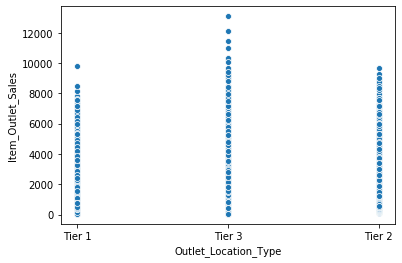

In [96]:
sns.scatterplot(x="Outlet_Location_Type",y="Item_Outlet_Sales",data=data_train)

**We can see avg sale is more in Tier 3 location compare to tier 1 and tier 2, which signify that there are lot of potential in tier 3 Cities.**

### 10.10 Outlet Type vs item Outlet Sale

In [97]:
data_train.groupby("Outlet_Type")["Item_Outlet_Sales"].mean()

Outlet_Type
Grocery Store         339.828500
Supermarket Type1    2316.181148
Supermarket Type2    1995.498739
Supermarket Type3    3694.038558
Name: Item_Outlet_Sales, dtype: float64

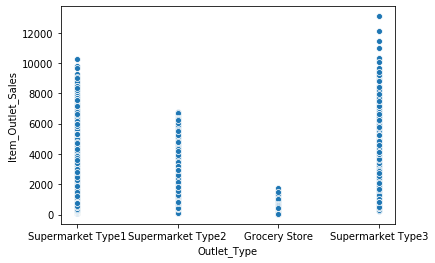

In [98]:
sns.scatterplot(x="Outlet_Type",y="Item_Outlet_Sales",data=data_train)

**here we can interpret that Supermarket Type3 contributing more in sales followed with Type 1,Type 2 and Grocery store.**

# 11 Multivariate Analysis

In [99]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


### 11.1 Outlet Size vs Outlet Type Vs Outlet location type with Item sale

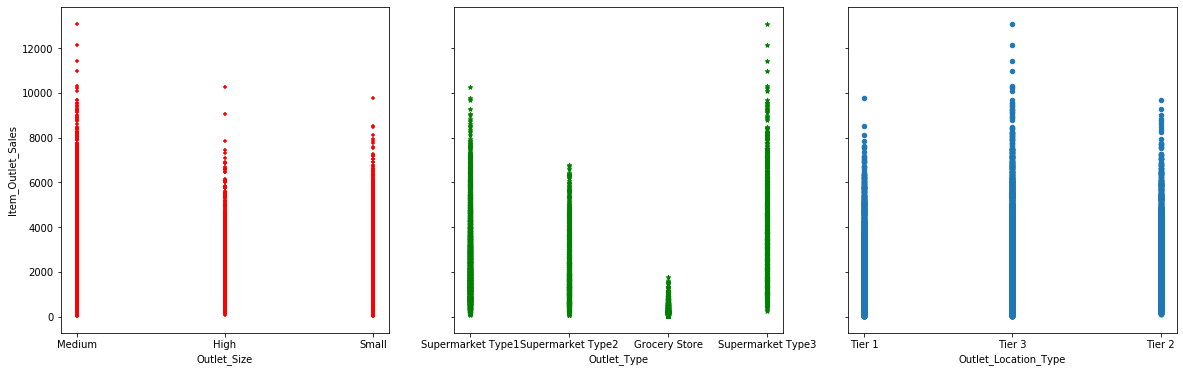

In [100]:
fig,axs=plt.subplots(1,3,sharey=True)## sharey works only to put y axis one time
data_train.plot(kind="scatter",x="Outlet_Size",y="Item_Outlet_Sales",ax=axs[0],figsize=(20,6),color="r",marker="+")
data_train.plot(kind="scatter",x="Outlet_Type",y="Item_Outlet_Sales",ax=axs[1],color="g",marker="*")
data_train.plot(kind="scatter",x="Outlet_Location_Type",y="Item_Outlet_Sales",ax=axs[2])

**we can interpret from above plot that Medium outlet size in tier 3 cities at type 3 supermarket are contributing more in sales.**

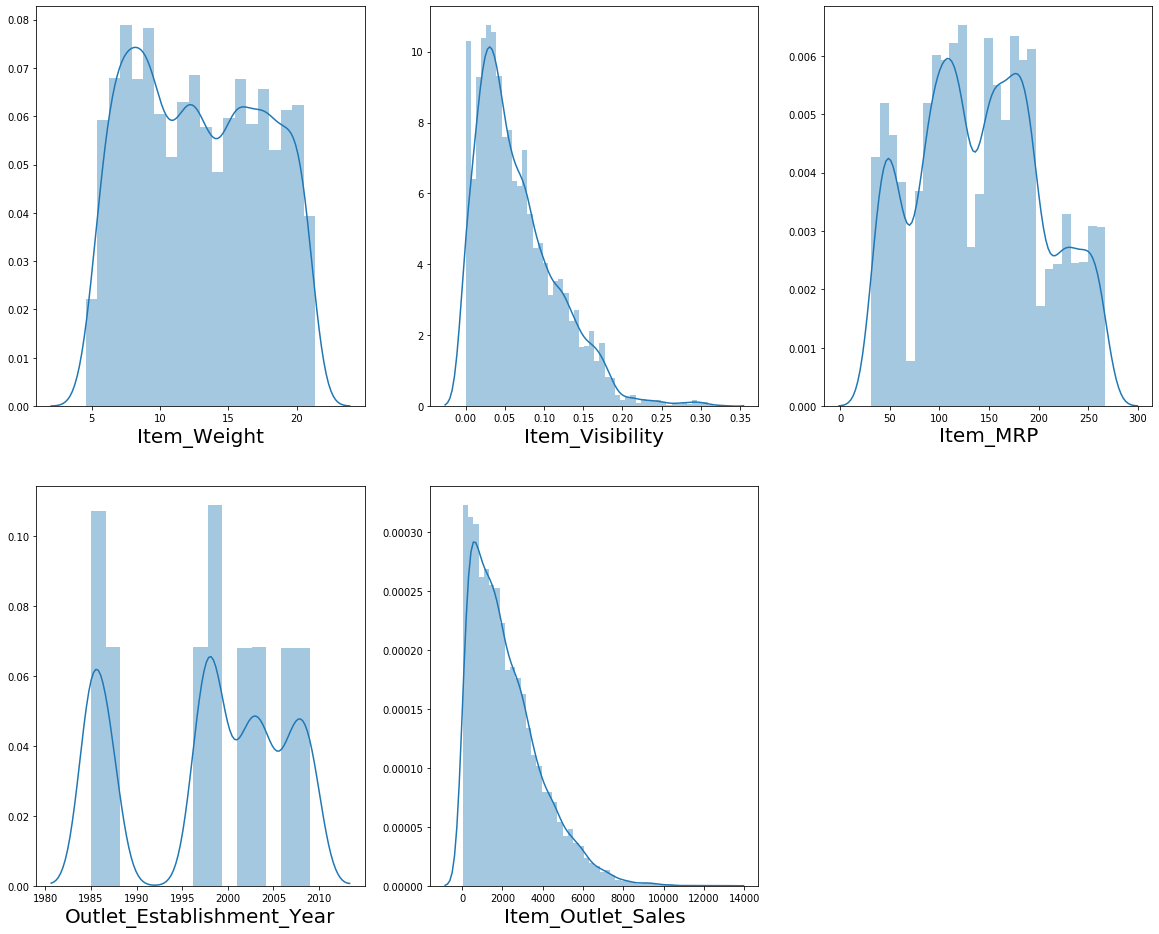

In [101]:
#lets see how data is distributed for every column.
plt.figure(figsize=(20,25),facecolor="white")
plotnumber=1
for column in train_num:
    if plotnumber<=9:
        ax=plt.subplot(3,3,plotnumber)
        sns.distplot(train_num[column])
        plt.xlabel(column,fontsize=20)
    plotnumber+=1
plt.show()

**We can interpret that Item Visibility and Item outlet sale data are right skeweed.**

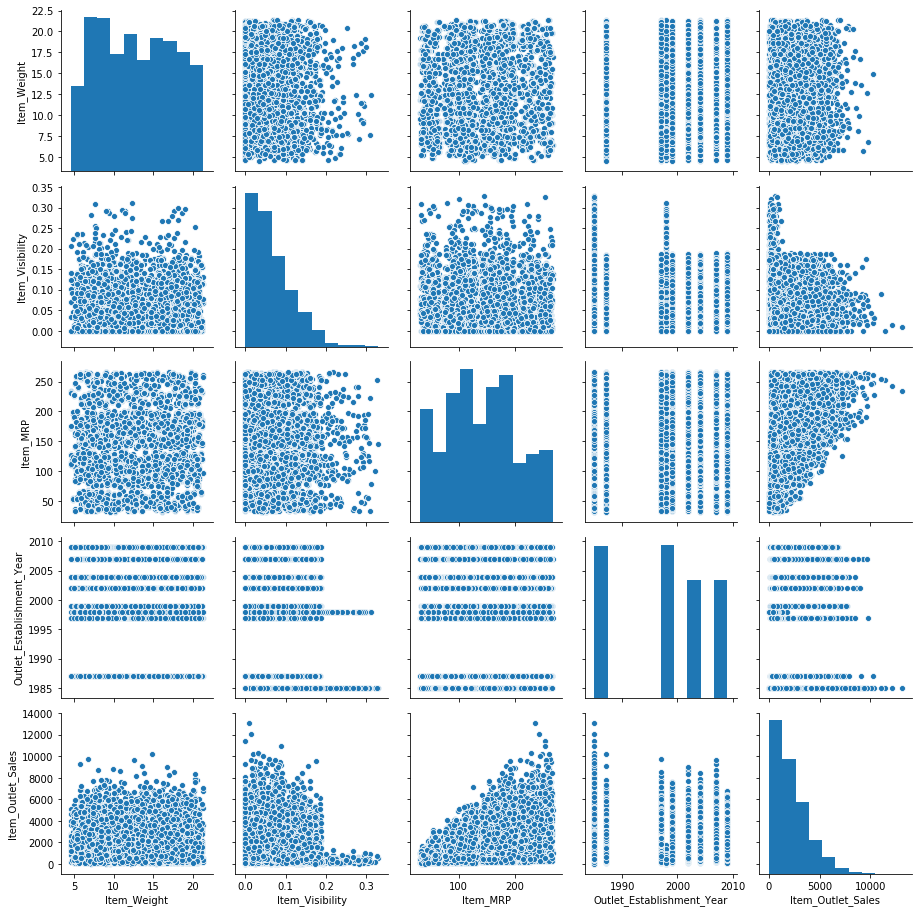

In [102]:
sns.pairplot(train_num)

In [103]:
train_num=pd.DataFrame(data_train.drop(columns=["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"],axis=1))
train_cat=pd.DataFrame(data_train.drop(columns=["Item_Weight","Item_Visibility","Item_MRP","Outlet_Establishment_Year","Item_Outlet_Sales"],axis=1))

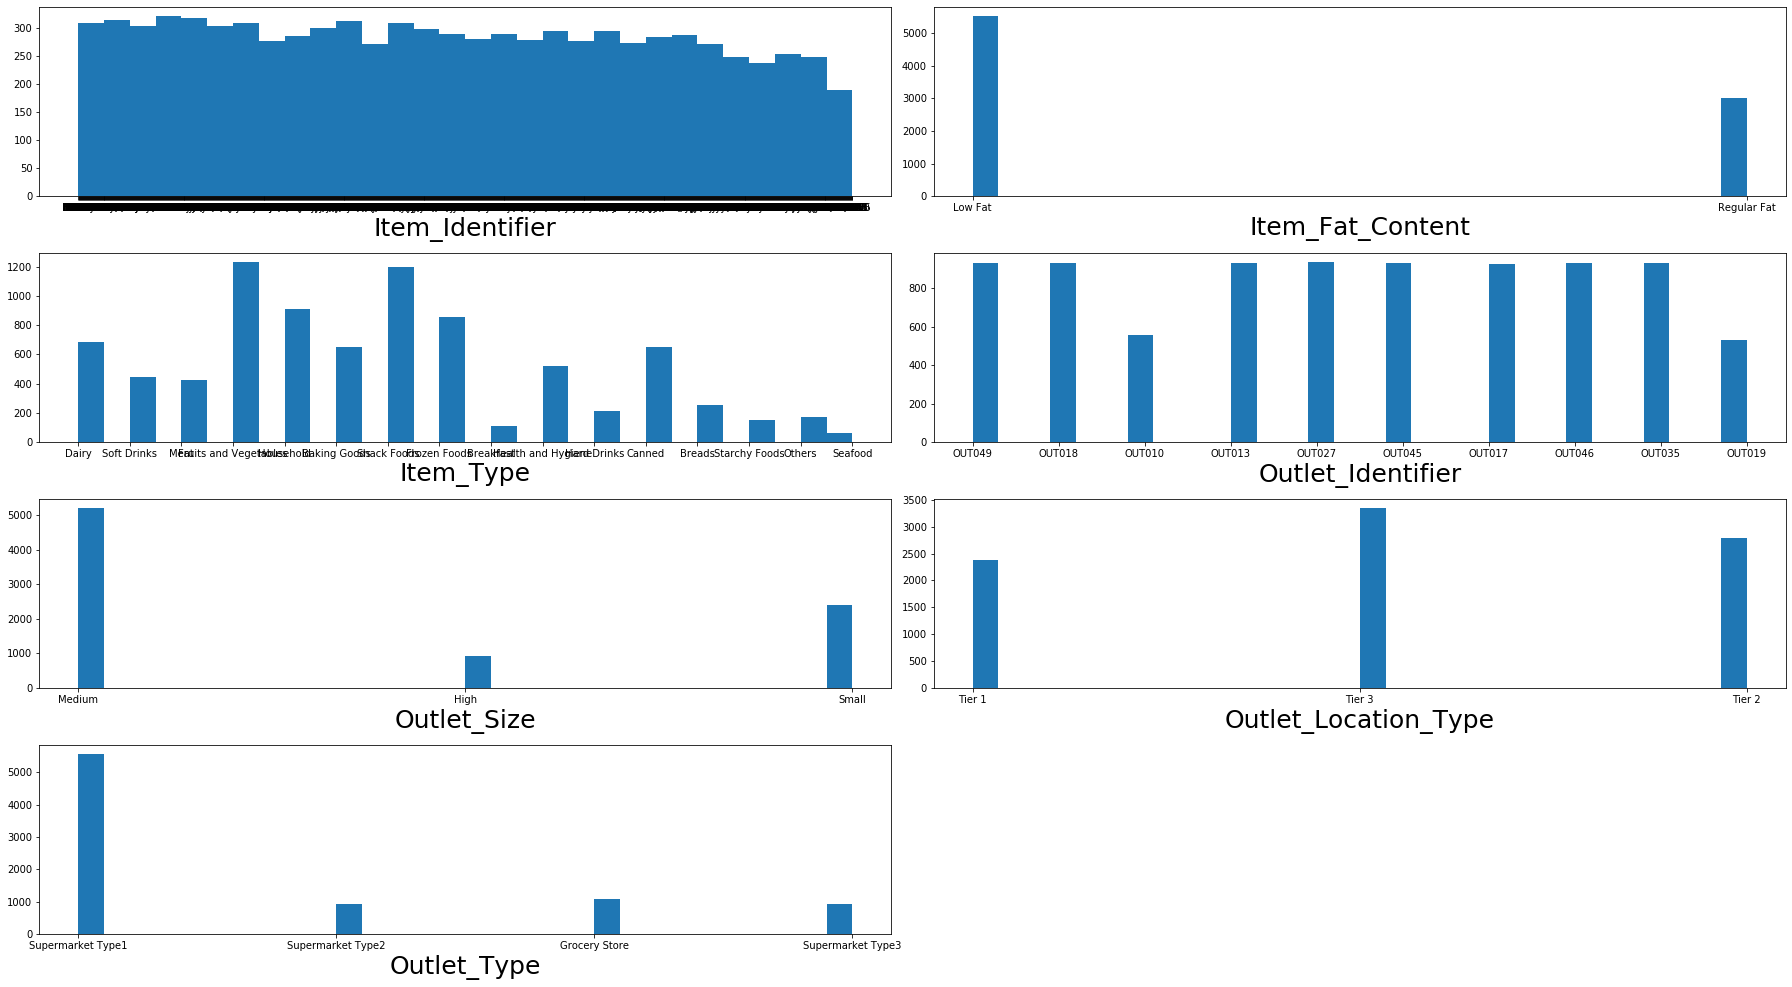

In [104]:
plt.figure(figsize=(25,20))
plotnumber=1
for column in train_cat:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        plt.hist(train_cat[column],bins=30)
        plt.xlabel(column,fontsize=25)
        
        plotnumber+=1
plt.tight_layout()
    

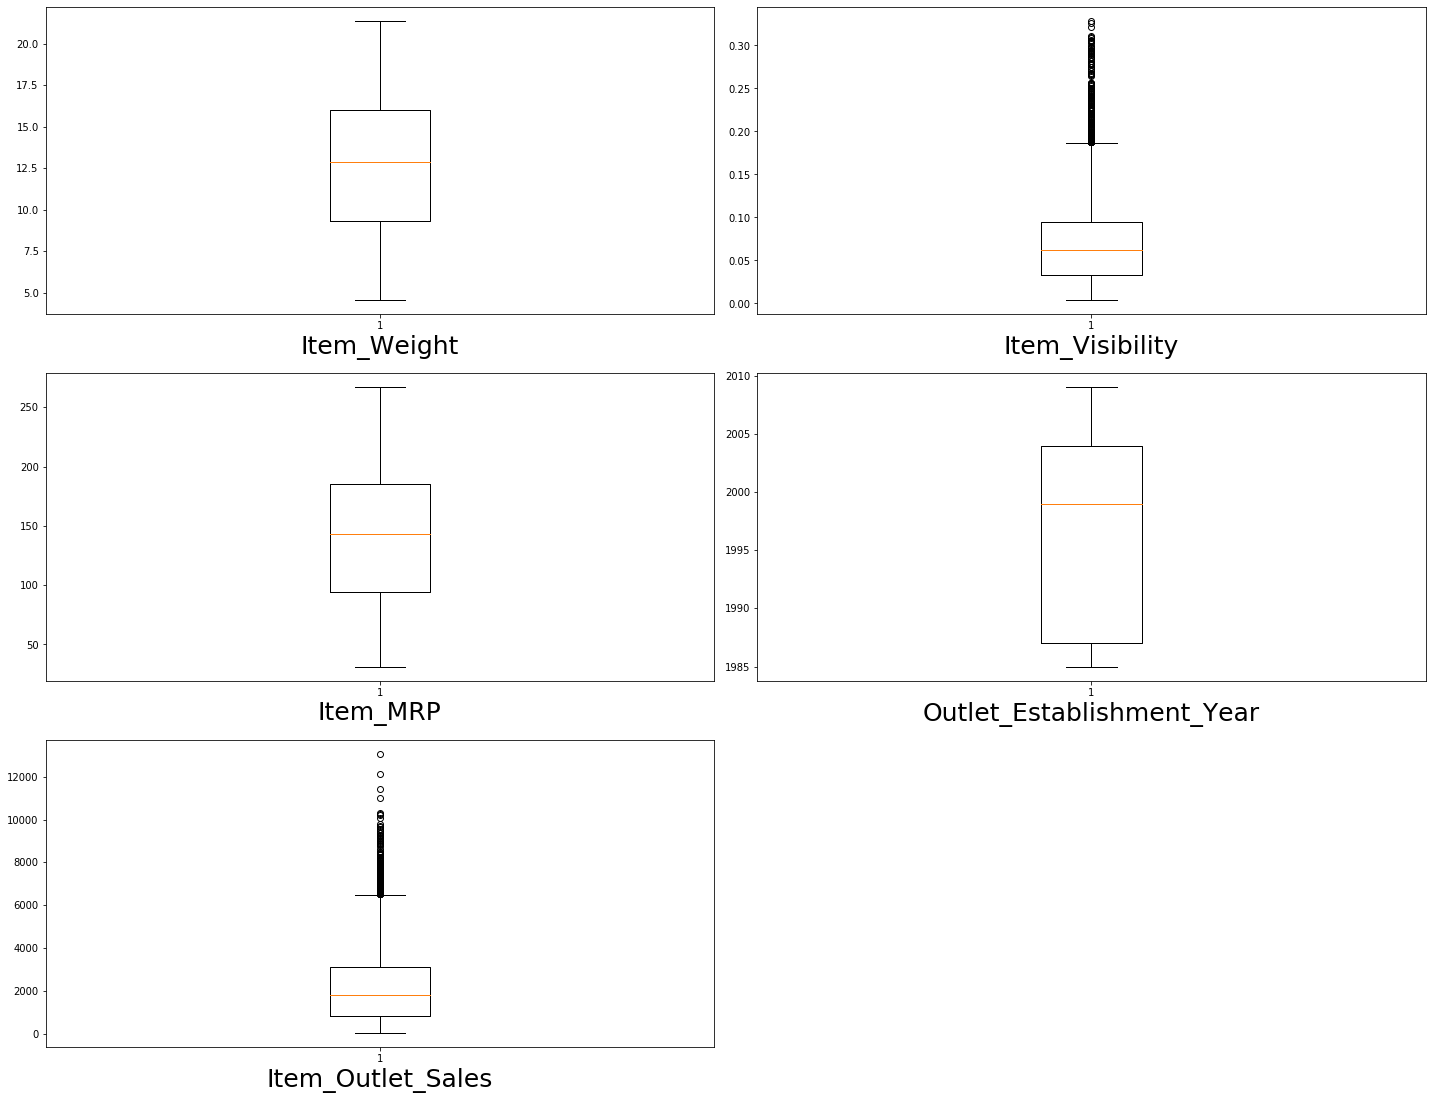

In [105]:
plt.figure(figsize=(20,30))
plotnumber=1
for column in train_num:
    if plotnumber<=12:
        ax=plt.subplot(6,2,plotnumber)
        plt.boxplot(train_num[column],)
        plt.xlabel(column,fontsize=25)
        
        plotnumber+=1
plt.tight_layout()
    
    

**We can see that there is outlier in item visibility and item outlet sales.**

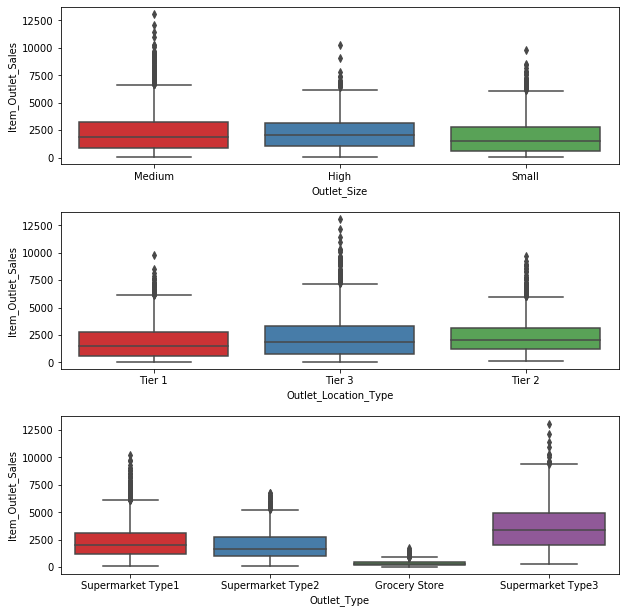

In [106]:
plt.figure(figsize = (10,9))

plt.subplot(311)
sns.boxplot(x='Outlet_Size', y='Item_Outlet_Sales', data=data_train, palette="Set1")

plt.subplot(312)
sns.boxplot(x='Outlet_Location_Type', y='Item_Outlet_Sales', data=data_train, palette="Set1")

plt.subplot(313)
sns.boxplot(x='Outlet_Type', y='Item_Outlet_Sales', data=data_train, palette="Set1")

plt.subplots_adjust(wspace = 0.1, hspace = 0.3,top = 1.0)

plt.show()


**We can interpret item sale vs outlet location,outlet type,outlet size, where we can analyse the outlier present.**

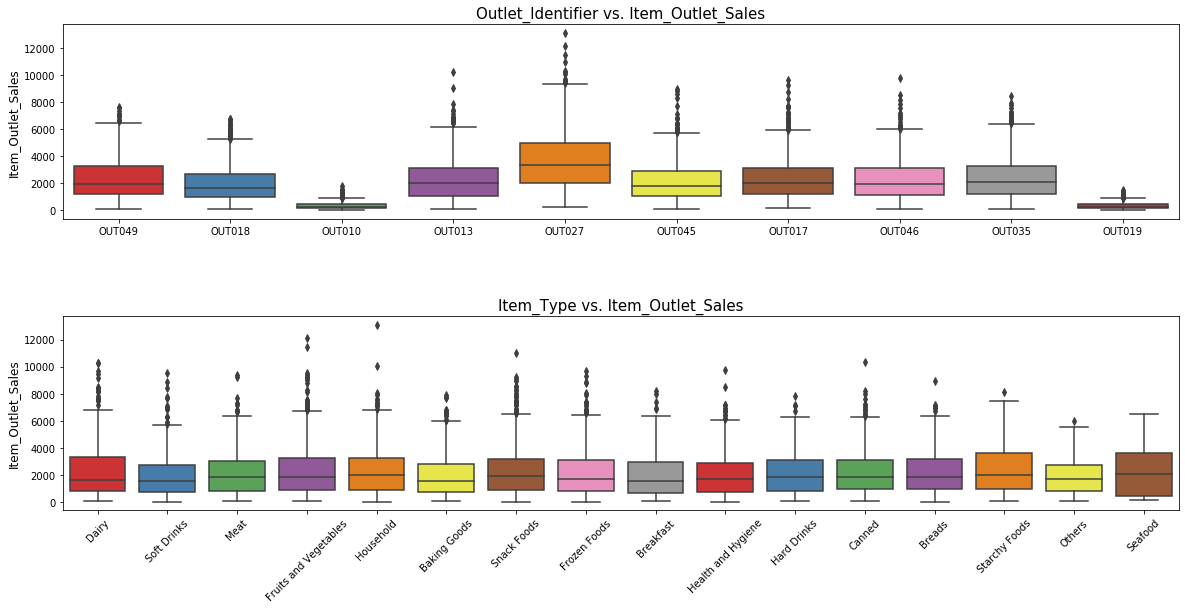

In [107]:
plt.figure(figsize = (20,18))

plt.subplot(211)
ax = sns.boxplot(x='Outlet_Identifier', y='Item_Outlet_Sales', data=data_train, palette="Set1")
ax.set_title("Outlet_Identifier vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplot(212)
ax = sns.boxplot(x='Item_Type', y='Item_Outlet_Sales', data=data_train, palette="Set1")
ax.set_title("Item_Type vs. Item_Outlet_Sales", fontsize=15)
ax.set_xlabel("", fontsize=12)
ax.set_ylabel("Item_Outlet_Sales", fontsize=12)

plt.subplots_adjust(hspace = 0.5, top = 0.5)
plt.setp(ax.get_xticklabels(), rotation=45)

plt.show()


**We can interpret outlet identifier vs item outlet sales and Item Type vs item outlet sales.**

In [108]:
train_num=pd.DataFrame(data_train.drop(columns=["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type"],axis=1))

In [109]:
data_train.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.017450,0.024756,-0.008301,0.011550
Item_Visibility,-0.017450,1.000000,-0.005259,-0.078355,-0.134138
Item_MRP,0.024756,-0.005259,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.008301,-0.078355,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.011550,-0.134138,0.567574,-0.049135,1.000000


**here we can see that item_weight is not at all correlation with item outlet sales.**

In [110]:
data_train.skew()

Item_Weight                  0.090561
Item_Visibility              1.286877
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

# 12. Dealing with Outliers in Item Visibility 

### For Train dataset Item Visibility

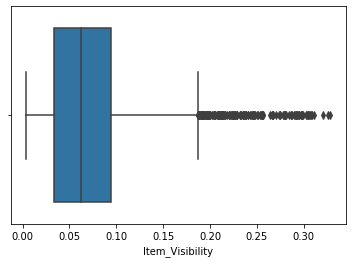

In [111]:
sns.boxplot(data_train["Item_Visibility"])

In [112]:
upper_limit=data_train["Item_Visibility"].mean()+3*data_train["Item_Visibility"].std()
lower_limit=data_train["Item_Visibility"].mean()-3*data_train["Item_Visibility"].std()

In [113]:
data_train['Item_Visibility'] = np.where(
    data_train['Item_Visibility']>upper_limit,
    upper_limit,
    np.where(
        data_train['Item_Visibility']<lower_limit,
        lower_limit,
        data_train['Item_Visibility']
    )
)

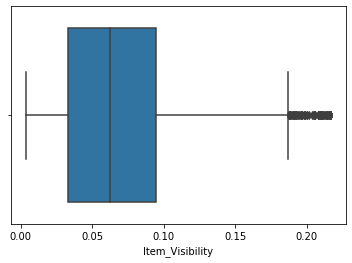

In [114]:
sns.boxplot(data_train["Item_Visibility"])

### For Test dataset Item Visibility

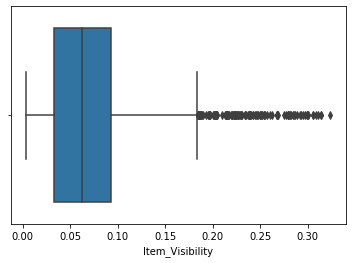

In [115]:
sns.boxplot(data_test["Item_Visibility"])

In [116]:
upper_limit=data_test["Item_Visibility"].mean()+3*data_train["Item_Visibility"].std()
lower_limit=data_test["Item_Visibility"].mean()-3*data_train["Item_Visibility"].std()

In [117]:
data_test['Item_Visibility'] = np.where(
    data_test['Item_Visibility']>upper_limit,
    upper_limit,
    np.where(
        data_test['Item_Visibility']<lower_limit,
        lower_limit,
        data_test['Item_Visibility']
    )
)

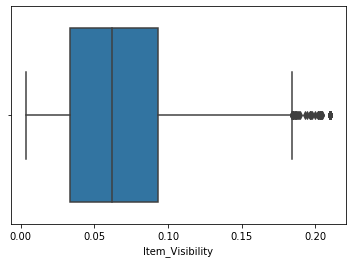

In [118]:
sns.boxplot(data_test["Item_Visibility"])

In [119]:
data_train.skew()

Item_Weight                  0.090561
Item_Visibility              0.985905
Item_MRP                     0.127202
Outlet_Establishment_Year   -0.396641
Item_Outlet_Sales            1.177531
dtype: float64

# 13 Dealing With Categorical Features

### 13.1 Item Identifier

**As we know that Item Identifier columns does not impact on sale and having unique Id,where first 2 character of ID represent the Segment belongs. like FD-Food,NC-Non Consumable,DR-Drink.**

**For Train dataset.**

In [120]:
Item_Identifier_class=[]
for i in data_train["Item_Identifier"]:
    Item_Identifier_class.append(i[:2])


In [121]:
data_train["Item_Identifier"]=Item_Identifier_class

In [122]:
data_train["Item_Identifier"].value_counts()

FD    6125
NC    1599
DR     799
Name: Item_Identifier, dtype: int64

**For Test Dataset.**

In [123]:
Item_Identifier_class1=[]
for i in data_test["Item_Identifier"]:
    Item_Identifier_class1.append(i[:2])


In [124]:
data_test["Item_Identifier"]=Item_Identifier_class1

In [125]:
data_test["Item_Identifier"].value_counts()

FD    4076
NC    1087
DR     518
Name: Item_Identifier, dtype: int64

### 13.2 Dealing with Item Fat Content

** As we have seen there are some product which is belong to Non-Consumable means household product, so i need to change the fat content columns to Non-Consumable for those which are belong to household Segment.**

**For Train Dataset.**

In [126]:
data_train[["Item_Identifier","Item_Fat_Content"]]

,Item_Identifier,Item_Fat_Content
0,FD,Low Fat
1,DR,Regular Fat
2,FD,Low Fat
3,FD,Regular Fat
4,NC,Low Fat
...,...,...
8518,FD,Low Fat
8519,FD,Regular Fat
8520,NC,Low Fat
8521,FD,Regular Fat


In [127]:
data_train["Item_Fat_Content"].value_counts()

Low Fat        5517
Regular Fat    3006
Name: Item_Fat_Content, dtype: int64

In [128]:
data_train.loc[data_train["Item_Identifier"]=="NC","Item_Fat_Content"] = "Non-Edible"

In [129]:
data_train["Item_Fat_Content"].value_counts()

Low Fat        3918
Regular Fat    3006
Non-Edible     1599
Name: Item_Fat_Content, dtype: int64

**For Test Dataset.**

In [130]:
data_test[["Item_Identifier","Item_Fat_Content"]]

,Item_Identifier,Item_Fat_Content
0,FD,Low Fat
1,FD,Regular Fat
2,NC,Low Fat
3,FD,Low Fat
4,FD,Regular Fat
...,...,...
5676,FD,Regular Fat
5677,FD,Regular Fat
5678,NC,Low Fat
5679,FD,Regular Fat


In [131]:
data_test["Item_Fat_Content"].value_counts()

Low Fat        3668
Regular Fat    2013
Name: Item_Fat_Content, dtype: int64

In [132]:
data_test.loc[data_test["Item_Identifier"]=="NC","Item_Fat_Content"]="Non-Edible"

In [133]:
data_test["Item_Fat_Content"].value_counts()

Low Fat        2581
Regular Fat    2013
Non-Edible     1087
Name: Item_Fat_Content, dtype: int64

In [134]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


# 14 Encoding Categorical Feature with one hot encoder

## 14.1 For Train Dataset

In [135]:
data_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FD,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DR,5.920,Regular Fat,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FD,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FD,19.200,Regular Fat,0.066132,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NC,8.930,Non-Edible,0.066132,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FD,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FD,8.380,Regular Fat,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NC,10.600,Non-Edible,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FD,7.210,Regular Fat,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [136]:
data_train=pd.get_dummies(data_train,columns=["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type","Outlet_Establishment_Year"])

In [137]:
data_train

,Item_Weight,Item_Visibility,Item_MRP,Item_Outlet_Sales,Item_Identifier_DR,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular Fat,...,Outlet_Type_Supermarket Type3,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
0,9.300,0.016047,249.8092,3735.1380,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1,5.920,0.019278,48.2692,443.4228,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
2,17.500,0.016760,141.6180,2097.2700,0,1,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
3,19.200,0.066132,182.0950,732.3800,0,1,0,0,0,1,...,0,0,0,0,1,0,0,0,0,0
4,8.930,0.066132,53.8614,994.7052,0,0,1,0,1,0,...,0,0,1,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8518,6.865,0.056783,214.5218,2778.3834,0,1,0,1,0,0,...,0,0,1,0,0,0,0,0,0,0
8519,8.380,0.046982,108.1570,549.2850,0,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
8520,10.600,0.035186,85.1224,1193.1136,0,0,1,0,1,0,...,0,0,0,0,0,0,0,1,0,0
8521,7.210,0.145221,103.1332,1845.5976,0,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1


## 14.2 For Test Dataset

In [138]:
data_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FD,20.750000,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FD,8.300000,Regular Fat,0.038428,Dairy,87.3198,OUT017,2007,Medium,Tier 2,Supermarket Type1
2,NC,14.600000,Non-Edible,0.099575,Others,241.7538,OUT010,1998,Medium,Tier 3,Grocery Store
3,FD,7.315000,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,Medium,Tier 2,Supermarket Type1
4,FD,12.695633,Regular Fat,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FD,10.500000,Regular Fat,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FD,7.600000,Regular Fat,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NC,10.000000,Non-Edible,0.073529,Health and Hygiene,118.7440,OUT045,2002,Medium,Tier 2,Supermarket Type1
5679,FD,15.300000,Regular Fat,0.065684,Canned,214.6218,OUT017,2007,Medium,Tier 2,Supermarket Type1


In [139]:
data_test=pd.get_dummies(data_test,columns=["Item_Identifier","Item_Fat_Content","Item_Type","Outlet_Identifier","Outlet_Size","Outlet_Location_Type","Outlet_Type","Outlet_Establishment_Year"])

In [140]:
data_test

,Item_Weight,Item_Visibility,Item_MRP,Item_Identifier_DR,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular Fat,Item_Type_Baking Goods,...,Outlet_Type_Supermarket Type3,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
0,20.750000,0.007565,107.8622,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,8.300000,0.038428,87.3198,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,14.600000,0.099575,241.7538,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,7.315000,0.015388,155.0340,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,12.695633,0.118599,234.2300,0,1,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,0.013496,141.3154,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5677,7.600000,0.142991,169.1448,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5678,10.000000,0.073529,118.7440,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5679,15.300000,0.065684,214.6218,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


# 16. Spliting train dataset

In [141]:
x=data_train.drop("Item_Outlet_Sales",axis=1)

# 17. Transformation of target variable


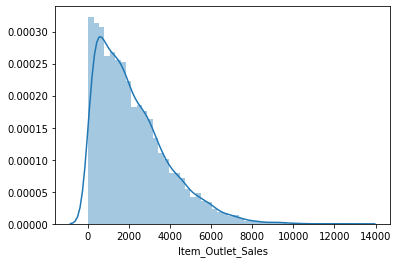

In [142]:
sns.distplot(data_train["Item_Outlet_Sales"])

**As we have seen before also that our target variable is not normal distribution, having data skeweed. So we will perform log Transform on our target variable.**

In [143]:
y=np.log(data_train["Item_Outlet_Sales"])

In [144]:
x.shape

(8523, 54)

In [145]:
y

0       8.225540
1       6.094524
2       7.648392
3       6.596300
4       6.902446
          ...   
8518    7.929625
8519    6.308617
8520    7.084322
8521    7.520558
8522    6.640751
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [146]:
y.shape

(8523,)

# 15 Features Transformation with Standard Scaler

In [147]:
from sklearn.preprocessing import StandardScaler

In [148]:
scaler=StandardScaler()

In [149]:
x_scaled=scaler.fit_transform(x)

In [150]:
x_scaled.shape

(8523, 54)

In [151]:
data_test

,Item_Weight,Item_Visibility,Item_MRP,Item_Identifier_DR,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular Fat,Item_Type_Baking Goods,...,Outlet_Type_Supermarket Type3,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
0,20.750000,0.007565,107.8622,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,8.300000,0.038428,87.3198,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,14.600000,0.099575,241.7538,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,7.315000,0.015388,155.0340,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,12.695633,0.118599,234.2300,0,1,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,0.013496,141.3154,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5677,7.600000,0.142991,169.1448,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5678,10.000000,0.073529,118.7440,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5679,15.300000,0.065684,214.6218,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [152]:
x_scaled_test=scaler.fit_transform(data_test)

In [153]:
x_scaled_test.shape

(5681, 54)

# 16. Model Building

## 16.1 Linear Regression

In [154]:
from sklearn.linear_model import LinearRegression

In [155]:
mlr=LinearRegression()

## 16.2 Choosing best random state

In [158]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
mlr=LinearRegression()
for i in range(0,500):
    x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=i)
    mlr.fit(x_train,y_train)
    pred_train=mlr.predict(x_train)
    pred_test=mlr.predict(x_test)
    
    if round(r2_score(y_train,pred_train)*100,1)==round(r2_score(y_test,pred_test)*100,1):
        print("At random state",i,"Model perfrom well")
        print("At random state",i)
        print("Training R2_score is-",r2_score(y_train,pred_train)*100)
        print("Testing R2_score is-",r2_score(y_test,pred_test)*100)

At random state 33 Model perfrom well
At random state 33
Training R2_score is- 72.08707138614
Testing R2_score is- 72.05686540425187
At random state 81 Model perfrom well
At random state 81
Training R2_score is- 72.1165506373602
Testing R2_score is- 72.07166418987487
At random state 113 Model perfrom well
At random state 113
Training R2_score is- 72.0954875864946
Testing R2_score is- 72.11436475125343
At random state 114 Model perfrom well
At random state 114
Training R2_score is- 72.08105245303909
Testing R2_score is- 72.07318156988882
At random state 120 Model perfrom well
At random state 120
Training R2_score is- 72.03996024073759
Testing R2_score is- 72.03212985950135
At random state 122 Model perfrom well
At random state 122
Training R2_score is- 72.05916255435073
Testing R2_score is- 72.13816238438014
At random state 135 Model perfrom well
At random state 135
Training R2_score is- 72.01203655896342
Testing R2_score is- 72.02500024050785
At random state 143 Model perfrom well
At r

**we can choose random state 486**

In [159]:
x_train,x_test,y_train,y_test=train_test_split(x_scaled,y,test_size=0.30,random_state=486)

In [160]:
mlr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [161]:
y_pred=mlr.predict(x_test)

In [162]:
y_train_pred=mlr.predict(x_train)

In [163]:
r2_score(y_test,y_pred)

0.7210256260246355

In [164]:
r2_score(y_train,y_train_pred)

0.7210916458249179

## 16.3 Checking with polynomial

In [165]:
from sklearn.preprocessing import PolynomialFeatures

In [166]:
poly_convertor=PolynomialFeatures(degree=2)

In [167]:
poly_feature=poly_convertor.fit_transform(x_scaled)

In [168]:
poly_feature.shape

(8523, 1540)

In [188]:
x_train, x_test, y_train, y_test = train_test_split(poly_feature, y, test_size=0.30, random_state=486)

In [189]:
mlr.fit(x_train,y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

### 16.3.1 Evaluation Matrix

In [190]:
poly_pred=mlr.predict(x_test)

In [191]:
mlr.coef_

array([ 8.29078734e+11,  6.23175237e+10,  5.36668658e-03, ...,
        1.49783697e+11, -2.29807449e+09,  6.16350479e+10])

In [192]:
from sklearn.metrics import mean_absolute_error,mean_squared_error

In [193]:
MAE=mean_absolute_error(y_test,poly_pred)

In [194]:
MSE=mean_squared_error(y_test,poly_pred)

In [195]:
RMSE=np.sqrt(MSE)

In [196]:
print(MAE)
print(RMSE)

0.42135650465580965
0.5454224004283725


In [197]:
mlr_score=r2_score(y_test,poly_pred)

In [198]:
mlr_score

0.7236910012385109

### 16.4 Checking CV Score

In [180]:
from sklearn.model_selection import cross_val_score

In [181]:
cross_val_score(mlr,poly_feature, y, cv=3)

array([0.71480944, 0.72581976, 0.73457449])

In [182]:
cross_val_score(mlr,poly_feature, y, cv=3).mean()

0.7250678968257388

In [183]:
for j in range(2,15):
    mlr_scores=cross_val_score(mlr,poly_feature,y,cv=j)
    mlr_s=mlr_scores.mean()
    print("At CV:-",j)
    print("Cross validation score is:",mlr_scores*100)
    print("r2 Score:",mlr_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [70.97347328 72.89272962]
r2 Score: 71.93310145293391


At CV:- 3
Cross validation score is: [71.48094421 72.58197616 73.45744868]
r2 Score: 72.50678968257388


At CV:- 4
Cross validation score is: [72.15323584 70.78974808 73.64612559 73.67404523]
r2 Score: 72.56578868922631


At CV:- 5
Cross validation score is: [72.66869605 72.39592797 71.53016588 72.17435198 75.00288464]
r2 Score: 72.75440530501457


At CV:- 6
Cross validation score is: [72.64293981 71.32319267 71.15173898 73.73396723 73.75959734 73.68589495]
r2 Score: 72.71622183250108


At CV:- 7
Cross validation score is: [72.49618194 71.38475334 71.63059547 73.02169486 73.6041455  73.79227696
 73.68912385]
r2 Score: 72.80268170331576


At CV:- 8
Cross validation score is: [73.19258673 71.52723875 72.50009215 70.20478999 73.09026432 74.67650184
 73.12129641 74.59701745]
r2 Score: 72.86372345540768


At CV:- 9
Cross validation score is: [72.42992408 72.62471491 70.9115172  72.68458399 73.816564

**As we can see best CV 11.**

In [199]:
cross_val_score(mlr,poly_feature, y, cv=11)

array([0.71209345, 0.74413203, 0.71085309, 0.72251628, 0.71474289,
       0.73687467, 0.72735531, 0.7470443 , 0.72557174, 0.74476407,
       0.74335397])

In [200]:
cross_val_score(mlr,poly_feature, y, cv=7).mean()

0.7280268170331575

In [201]:
mlr_cv_score=cross_val_score(mlr,poly_feature, y, cv=7).mean()

In [202]:
mlr_cv_score

0.7280268170331575

# 17. Ridge Regression

In [203]:
from sklearn.linear_model import Ridge,RidgeCV

In [204]:
ridge_model=Ridge(alpha=10)

In [205]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=10, copy_X=True, fit_intercept=True, max_iter=None, normalize=False,
      random_state=None, solver='auto', tol=0.001)

## 17.1 Evaluation matrix

In [206]:
test_predictions=ridge_model.predict(x_test)

In [207]:
ridge_model_score=r2_score(y_test,test_predictions)

In [208]:
ridge_model_score=ridge_model_score

In [209]:
MAE=mean_absolute_error(y_test,y_pred)

In [210]:
MAE

0.42533004613045505

In [211]:
MSE=mean_squared_error(y_test,y_pred)

In [212]:
MSE

0.3003552471068779

In [213]:
RMSE=np.sqrt(MSE)

In [214]:
RMSE

0.54804675631453

In [215]:
ridge_model_score

0.7260618604177106

## 17.2 Finding best alpha value

In [216]:
ridge_cv_model=RidgeCV(alphas=(0.1,1.0,10.0))

In [217]:
ridge_cv_model.fit(x_train,y_train)

RidgeCV(alphas=array([ 0.1,  1. , 10. ]), cv=None, fit_intercept=True,
        gcv_mode=None, normalize=False, scoring=None, store_cv_values=False)

In [218]:
ridge_cv_model.alpha_

10.0

## 17.3 Cross validation score

In [219]:
cross_val_score(ridge_model,poly_feature, y, cv=3)

array([0.71941442, 0.72638781, 0.73533639])

In [220]:
Ridge_model_cv_score=cross_val_score(ridge_model,poly_feature, y, cv=3).mean()

In [221]:
Ridge_model_cv_score

0.7270462052524631

## 17.4 Find best CV

In [1876]:
for j in range(2,15):
    ridge_model_scores=cross_val_score(ridge_model,poly_feature,y,cv=j)
    ridge_model_s=ridge_model_scores.mean()
    print("At CV:-",j)
    print("Cross validation score is:",ridge_model_scores*100)
    print("r2 Score:",ridge_model_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [71.04198368 72.97173462]
r2 Score: 72.00685915033152


At CV:- 3
Cross validation score is: [71.94315413 72.63976812 73.5390645 ]
r2 Score: 72.7073289182201


At CV:- 4
Cross validation score is: [72.3630614  71.18658769 73.78472731 73.71712248]
r2 Score: 72.76287471957868


At CV:- 5
Cross validation score is: [72.80498306 72.52032256 71.58191125 72.17131087 74.99257848]
r2 Score: 72.8142212421208


At CV:- 6
Cross validation score is: [72.87832572 71.5091124  71.18239454 73.90577397 74.00585811 73.9931758 ]
r2 Score: 72.91244008909355


At CV:- 7
Cross validation score is: [72.79470894 71.61707929 72.02654211 73.08467764 73.52850815 73.81193287
 73.85219491]
r2 Score: 72.95937769887526


At CV:- 8
Cross validation score is: [73.24062624 71.56311167 72.58947641 70.30825518 73.31855953 74.77911177
 73.1353931  74.57640494]
r2 Score: 72.93886735559245


At CV:- 9
Cross validation score is: [72.54163837 72.92514532 70.85731786 72.73535122 73.9083975 

**we can see cv 11 is having better result.**

In [222]:
cross_val_score(ridge_model,poly_feature, y, cv=11)

array([0.71426062, 0.74711229, 0.7103151 , 0.72498297, 0.71437831,
       0.73744088, 0.72721781, 0.74662065, 0.72564328, 0.74493332,
       0.74419731])

In [223]:
ridge_model_cv_score=cross_val_score(ridge_model,poly_feature, y, cv=11).mean()

In [224]:
ridge_model_cv_score

0.7306456850235811

# 18.Support Vector Regression

In [225]:
from sklearn.svm import SVR

In [226]:
svr=SVR()

In [239]:
x_train, x_test, y_train, y_test = train_test_split(poly_feature, y, test_size=0.30, random_state=486)

In [240]:
svr.fit(x_train,y_train)

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## 18.1 Evaluation Matrix

In [242]:
y_pred=svr.predict(x_test)

In [243]:
svr_score=r2_score(y_test,y_pred)

In [244]:
svr_score

0.697145169532803

In [245]:
MAE=mean_absolute_error(y_test,y_pred)

In [246]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [247]:
MAE

0.4335420729808063

In [248]:
RMSE

0.5710218257694818

## 18.2 Cross validation score

In [249]:
cross_val_score(ridge_model,poly_feature, y, cv=3)

array([0.71941442, 0.72638781, 0.73533639])

In [250]:
svr_cv_score=cross_val_score(ridge_model,poly_feature, y, cv=3).mean()

In [251]:
svr_cv_score

0.7270462052524631

## 18.3 Find best CV

In [1944]:
for j in range(2,10):
    svr_scores=cross_val_score(svr,poly_feature,y,cv=j)
    svr_s=ridge_model_scores.mean()
    print("At CV:-",j)
    print("Cross validation score is:",svr_scores*100)
    print("r2 Score:",svr_s*100)
    print('\n')

At CV:- 2
Cross validation score is: [67.28035769 69.18416858]
r2 Score: 72.96260612415207


At CV:- 3
Cross validation score is: [68.22388194 69.53466171 70.74097606]
r2 Score: 72.96260612415207


At CV:- 4
Cross validation score is: [68.83531791 68.25549859 71.12924651 70.94855091]
r2 Score: 72.96260612415207


At CV:- 5
Cross validation score is: [69.36202758 69.31814342 68.39796227 69.66096114 72.6162161 ]
r2 Score: 72.96260612415207


At CV:- 6
Cross validation score is: [70.24111897 67.76407335 68.80217732 70.92725029 71.56941762 71.35195392]
r2 Score: 72.96260612415207


At CV:- 7
Cross validation score is: [70.2408444  67.47888686 69.07865821 69.580039   71.52754008 71.26911951
 70.87543467]
r2 Score: 72.96260612415207


At CV:- 8
Cross validation score is: [70.53942237 67.93061371 69.51901661 67.78952946 70.26186028 72.82359571
 70.17600964 72.40595759]
r2 Score: 72.96260612415207


At CV:- 9
Cross validation score is: [70.11839673 69.26851832 67.459922   69.51605942 70.362119

# 19 Random Forest Regressor

In [252]:
from sklearn.ensemble import RandomForestRegressor

In [253]:
rf=RandomForestRegressor()

In [254]:
x_train, x_test, y_train, y_test = train_test_split(poly_feature, y, test_size=0.30, random_state=82)

In [255]:
rf.fit(x_train,y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

## 19.1 Evaluation Matrix

In [256]:
y_pred=rf.predict(x_test)

In [257]:
rf_score=r2_score(y_test,y_pred)

In [258]:
rf_score

0.7190256632856509

In [259]:
MAE=mean_absolute_error(y_test,y_pred)

In [260]:
MAE

0.4248597926035263

In [261]:
RMSE=np.sqrt(mean_squared_error(y_test,y_pred))

In [262]:
RMSE

0.5431570277618433

## 19.2 Cross Validation Score

In [263]:
cross_val_score(rf,poly_feature, y, cv=3)

array([0.69709909, 0.71045281, 0.71397259])

In [267]:
rf_cv_score=cross_val_score(rf,poly_feature, y, cv=3).mean()

# 20.Lets choose the best model using Cross validation comparism

In [268]:
Multiplelinear_Regression={"R2 Score":round(mlr_score,2),
                    "CV Score":round(mlr_cv_score,2),
                    "Difference":mlr_score-mlr_cv_score}
Ridge_Regression={"R2 Score":round(ridge_model_score,2),
                    "CV Score":round(Ridge_model_cv_score,2),
                    "Difference":ridge_model_score-ridge_model_cv_score}
Support_vector_machine={"R2 Score":round(svr_score,2),
                    "CV Score":round(svr_cv_score,2),
                    "Difference":svr_score-svr_cv_score}
Random_Forest_Regressor={"R2 Score":round(rf_score,2),
                    "CV Score":round(rf_cv_score,2),
                    "Difference":rf_score-rf_cv_score}


In [269]:
data=np.array([[mlr_score,mlr_cv_score,mlr_score-mlr_cv_score],[ridge_model_score,ridge_model_cv_score,ridge_model_score-ridge_model_cv_score],[svr_score,svr_cv_score,svr_score-svr_cv_score],[rf_score,rf_cv_score,rf_score-rf_cv_score]])

In [270]:
index_value=["MultiLinear Regression","Ridge Regression","Support Vector Regression","Random Forest Regressor"]

In [271]:
columns_value=["r2 Score","Cross Validation Score","Difference"]

In [272]:
model_selection=pd.DataFrame(data=data,
                            index=index_value,
                            columns=columns_value)

In [273]:
model_selection

,r2 Score,Cross Validation Score,Difference
MultiLinear Regression,0.723691,0.728027,-0.004336
Ridge Regression,0.726062,0.730646,-0.004584
Support Vector Regression,0.697145,0.727046,-0.029901
Random Forest Regressor,0.719026,0.708482,0.010543


**As we can see that MultiLinear Regression model works well in this dataset.**

# 21. Hyperparameter tuning with Ridge Regression

In [302]:
from sklearn.model_selection import GridSearchCV

In [323]:
params={'alpha':[0.1,1.0,10.0,100]     
       }

In [324]:
grdsrch = GridSearchCV(ridge_model,scoring='neg_mean_absolute_error', n_jobs=-1,param_grid=params)

In [325]:
grdsrch.fit(x_train,y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=Ridge(alpha=10.0, copy_X=True, fit_intercept=True,
                             max_iter=None, normalize=False, random_state=None,
                             solver='auto', tol=0.001),
             iid='deprecated', n_jobs=-1,
             param_grid={'alpha': [0.1, 1.0, 10.0, 100]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_absolute_error', verbose=0)

In [326]:
grdsrch.best_params_

{'alpha': 100}

In [327]:
ridge_model=grdsrch.best_estimator_

In [328]:
ridge_model.fit(x_train,y_train)

Ridge(alpha=100, copy_X=True, fit_intercept=True, max_iter=None,
      normalize=False, random_state=None, solver='auto', tol=0.001)

In [329]:
y_pred=ridge_model.predict(x_test)

In [330]:
r2_score(y_test,y_pred)

0.7332281252799908

**As we can see our model accuracy has increased after doing hyperparameter tunning from 0.72 to 0.73.**

# 21. Prediction based on test dataset provided to us.

In [312]:
data_test

,Item_Weight,Item_Visibility,Item_MRP,Item_Identifier_DR,Item_Identifier_FD,Item_Identifier_NC,Item_Fat_Content_Low Fat,Item_Fat_Content_Non-Edible,Item_Fat_Content_Regular Fat,Item_Type_Baking Goods,...,Outlet_Type_Supermarket Type3,Outlet_Establishment_Year_1985,Outlet_Establishment_Year_1987,Outlet_Establishment_Year_1997,Outlet_Establishment_Year_1998,Outlet_Establishment_Year_1999,Outlet_Establishment_Year_2002,Outlet_Establishment_Year_2004,Outlet_Establishment_Year_2007,Outlet_Establishment_Year_2009
0,20.750000,0.007565,107.8622,0,1,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,8.300000,0.038428,87.3198,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
2,14.600000,0.099575,241.7538,0,0,1,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
3,7.315000,0.015388,155.0340,0,1,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,12.695633,0.118599,234.2300,0,1,0,0,0,1,0,...,1,1,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5676,10.500000,0.013496,141.3154,0,1,0,0,0,1,0,...,0,0,0,1,0,0,0,0,0,0
5677,7.600000,0.142991,169.1448,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
5678,10.000000,0.073529,118.7440,0,0,1,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
5679,15.300000,0.065684,214.6218,0,1,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0


In [313]:
data_test.shape

(5681, 54)

### 21.1 Covert the test dataset into polynomial degree

In [314]:
poly_convertor=PolynomialFeatures(degree=2)

In [315]:
poly_feature=poly_convertor.fit_transform(data_test)

In [316]:
pred_test=mlr.predict(poly_feature)

In [317]:
pred_test

array([1.29052346e+13, 1.32246561e+13, 2.42288975e+13, ...,
       1.92918664e+13, 3.50948663e+13, 1.22737513e+13])

# 22 saving the model

In [318]:
import pickle

### 22.1 Saving model 

In [319]:
filename="Bigmart_predict.pkl"

In [320]:
pickle.dump(mlr,open(filename,"wb"))

### 22.2 Saving polyconvertor

In [321]:
filename="polyConvertor.pkl"

In [322]:
pickle.dump(poly_feature,open(filename,"wb"))